EMG shape: (3288, 8)


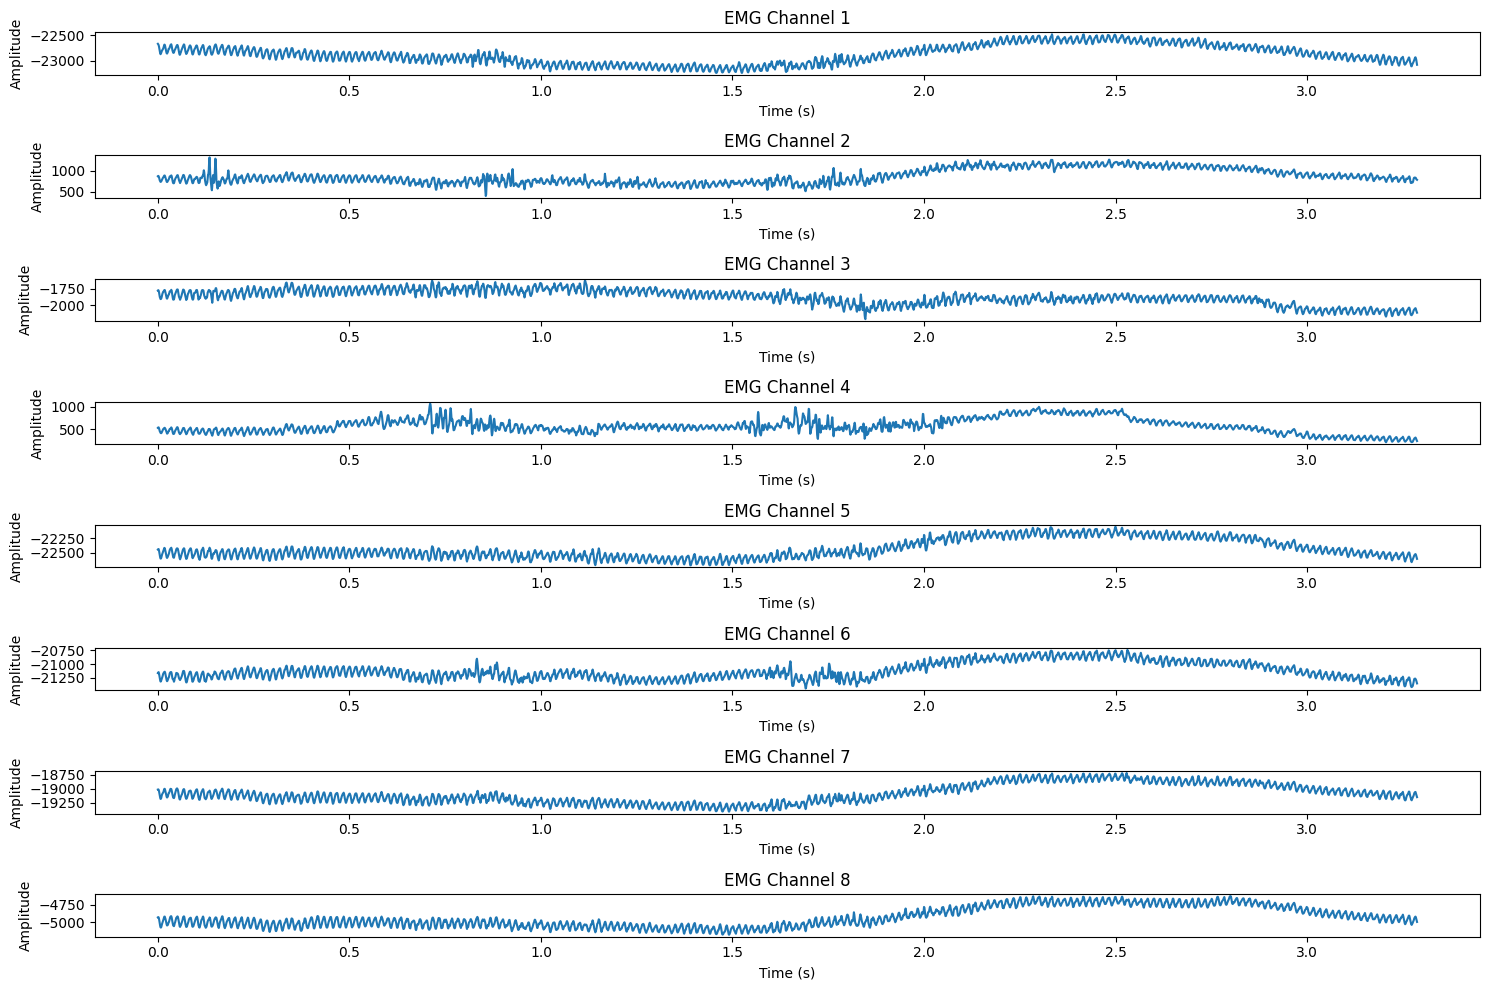

In [1]:
import numpy as np
import matplotlib.pyplot as plt

emg = np.load("/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/emg/0_5-4_3_emg.npy")   # shape: (time, 8)

print("EMG shape:", emg.shape)

# Time axis (assuming 1000 Hz sampling, adjust if different)
fs = 1000  # Hz, change if you know the actual sampling rate
time = np.arange(emg.shape[0]) / fs

# Plot all 8 channels
plt.figure(figsize=(15, 10))
for ch in range(emg.shape[1]):
    plt.subplot(emg.shape[1], 1, ch+1)
    plt.plot(time, emg[:, ch])
    plt.title(f"EMG Channel {ch+1}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()


EMG shape: (3288, 8)
Pitch shape: (15,)
Energy shape: (15,)
Duration shape: (15,)
Mel shape: (161, 80)


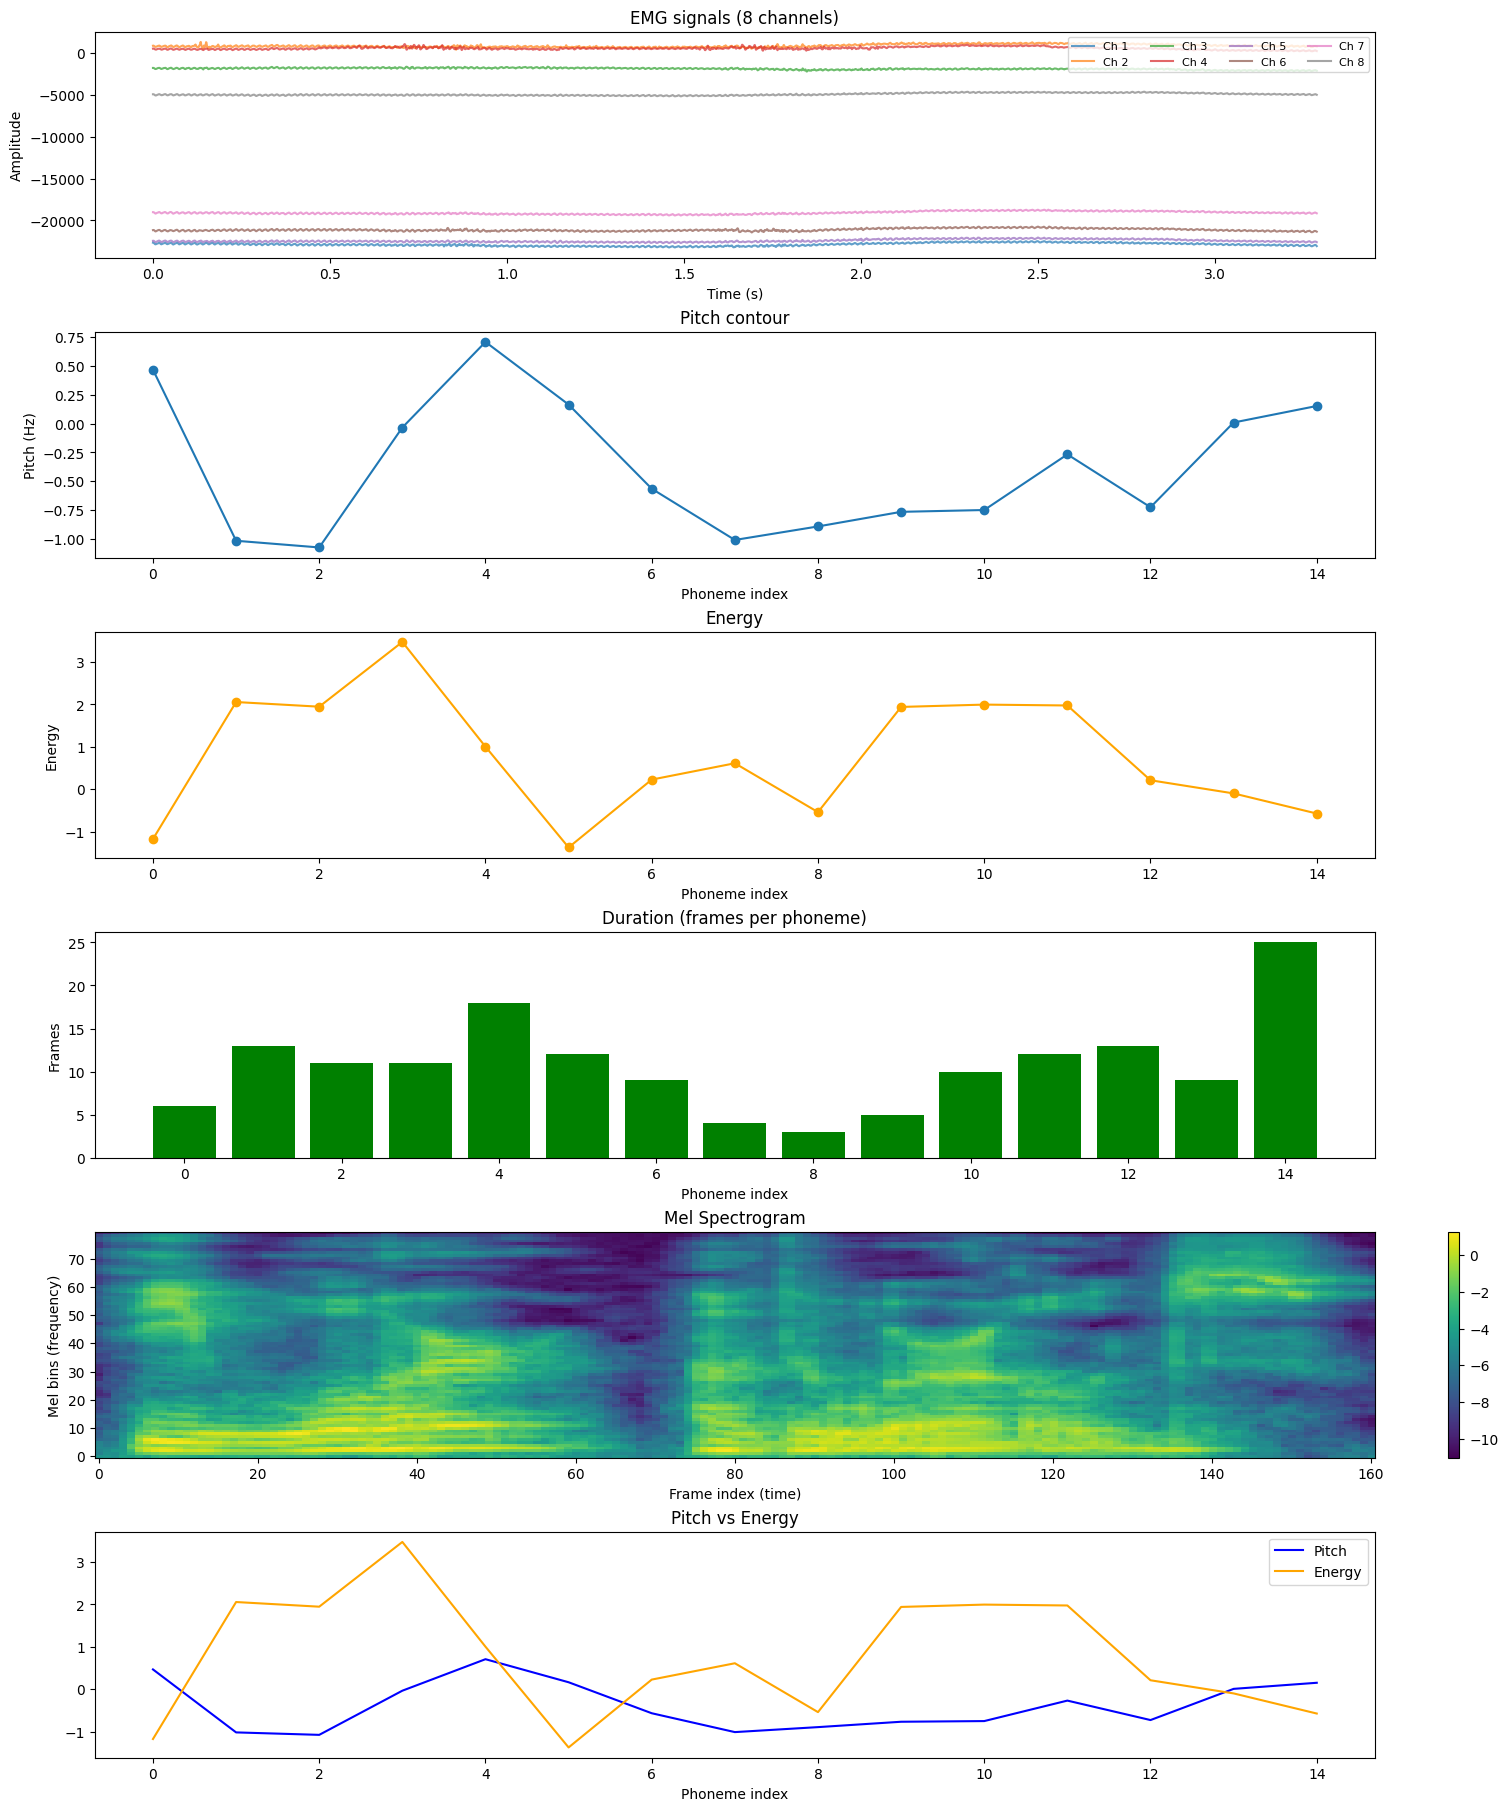

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Load files ====
emg = np.load("/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/emg/0_5-4_3_emg.npy")            # shape: (time, 8)
pitch = np.load("/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/pitch/0-pitch-0_5-4_3_audio_clean.npy")        # shape: (phoneme_len,)
energy = np.load("/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/energy/0-energy-0_5-4_3_audio_clean.npy")      # shape: (phoneme_len,)
duration = np.load("/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/duration/0-duration-0_5-4_3_audio_clean.npy")  # shape: (phoneme_len,)
mel = np.load("/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/mel/0-mel-0_5-4_3_audio_clean.npy")            # shape: (n_mels, mel_len)

print("EMG shape:", emg.shape)
print("Pitch shape:", pitch.shape)
print("Energy shape:", energy.shape)
print("Duration shape:", duration.shape)
print("Mel shape:", mel.shape)

# ==== Time axes ====
fs_emg = 1000  # Hz (assume, adjust if known)
time_emg = np.arange(emg.shape[0]) / fs_emg
time_pitch = np.arange(len(pitch))
time_energy = np.arange(len(energy))
time_duration = np.arange(len(duration))
time_mel = np.arange(mel.shape[1])

# ==== Plot ====
fig, axs = plt.subplots(6, 1, figsize=(15, 18), constrained_layout=True)

# 1. EMG (all channels overlay)
for ch in range(emg.shape[1]):
    axs[0].plot(time_emg, emg[:, ch], label=f"Ch {ch+1}", alpha=0.7)
axs[0].set_title("EMG signals (8 channels)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].legend(loc="upper right", ncol=4, fontsize=8)

# 2. Pitch
axs[1].plot(time_pitch, pitch, marker="o")
axs[1].set_title("Pitch contour")
axs[1].set_xlabel("Phoneme index")
axs[1].set_ylabel("Pitch (Hz)")

# 3. Energy
axs[2].plot(time_energy, energy, marker="o", color="orange")
axs[2].set_title("Energy")
axs[2].set_xlabel("Phoneme index")
axs[2].set_ylabel("Energy")

# 4. Duration
axs[3].bar(time_duration, duration, color="green")
axs[3].set_title("Duration (frames per phoneme)")
axs[3].set_xlabel("Phoneme index")
axs[3].set_ylabel("Frames")

# 5. Mel spectrogram
im = axs[4].imshow(
    mel.T,                     # transpose here
    aspect="auto",
    origin="lower",
    interpolation="none"
)
axs[4].set_title("Mel Spectrogram")
axs[4].set_xlabel("Frame index (time)")
axs[4].set_ylabel("Mel bins (frequency)")
fig.colorbar(im, ax=axs[4], orientation="vertical")

# 6. Compare pitch vs energy
axs[5].plot(time_pitch, pitch, label="Pitch", color="blue")
axs[5].plot(time_energy, energy, label="Energy", color="orange")
axs[5].set_title("Pitch vs Energy")
axs[5].set_xlabel("Phoneme index")
axs[5].legend()

plt.show()


In [ ]:
import numpy as np
import librosa

# Load EMG
emg = np.load("/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/emg/0_5-4_10_emg.npy")
num_emg_samples = emg.shape[0]

# Load audio
audio_path = "/home/jeonyj0612/silent-speech-v2/Dataset/EMG_raw_data/0/0_5-4_10_audio_clean.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None preserves original audio sample rate
duration_seconds = len(y) / sr

# Calculate EMG sampling rate
emg_sampling_rate = num_emg_samples / duration_seconds
print(f"EMG sampling rate: {emg_sampling_rate:.2f} Hz")


FileNotFoundError: [Errno 2] No such file or directory: '/home/jeonyj0612/silent-speech-v2/preprocessed_data/silent_speech_preprocessed/emg/0_5-4-silent_10_emg.npy'